## PHYS 513
### Dennies Bor

In [16]:
import numpy as np

#------------------Question 1-----------------------------------------
# Solved using the soln given in HW3
# The disk rotated while keeping the other boubndary conditions as zero

# Function to calculate the exact solution for phi(x, y)
def potential(x, y, V, x0=1, y0=1):
    result = 0
    for n in range(1, 100, 2):
        numerator = np.sin(n * np.pi * y / y0)
        denominator = n * np.sinh(n * np.pi * y0 / x0)
        hyperbolic = np.sinh(n * np.pi * (x0 - x) / y0)

        term = numerator / denominator * hyperbolic
        result += term

    return (V * 4 / np.pi) * result


v = [80, 100, 20, 60]

# Initialize potentials for the four points
phi_1 = 0  # phi1 (top left initially at 0.25, 0.75)
phi_2 = 0  # phi2 (top right initially at 0.75, 0.75)
phi_3 = 0  # phi3 (bottom left initially at 0.25, 0.25)
phi_4 = 0  # phi4 (bottom right initially at 0.75, 0.25)

# We shall rotate disk evaluating along x axis
coordinates = [
    [(0.25, 0.75), (0.75, 0.75), (0.25, 0.25), (0.75, 0.25)],  # Initial
    [(0.25, 0.25), (0.25, 0.75), (0.75, 0.25), (0.75, 0.75)],  # Rotated anticlockwise
    [(0.75, 0.25), (0.25, 0.25), (0.75, 0.75), (0.25, 0.75)],  # Second rot
    [(0.75, 0.75), (0.75, 0.25), (0.25, 0.75), (0.25, 0.25)]   # Third rot
]

for i, V in enumerate(v):
    phi_1 += potential(coordinates[i][0][0], coordinates[i][0][1], V=V)
    phi_2 += potential(coordinates[i][1][0], coordinates[i][1][1], V=V)
    phi_3 += potential(coordinates[i][2][0], coordinates[i][2][1], V=V)
    phi_4 += potential(coordinates[i][3][0], coordinates[i][3][1], V=V)

print(f"Phi1 (0.25, 0.75) = {phi_1:.4f}")
print(f"Phi2 (0.75, 0.75) = {phi_2:.4f}")
print(f"Phi3 (0.25, 0.25) = {phi_3:.4f}")
print(f"Phi4 (0.75, 0.25) = {phi_4:.4f}")


Phi1 (0.25, 0.75) = 83.2028
Phi2 (0.75, 0.75) = 61.3594
Phi3 (0.25, 0.25) = 68.6406
Phi4 (0.75, 0.25) = 46.7972


In [ ]:
#--------------------------Question 5.2.1/2-------------------------------------

## Derivation of Potential in a Parallel Plate Capacitor with Two Dielectrics

Given:
- $\nabla^2\psi = 0$ in each dielectric &
- Boundary conditions: $\psi_1(0) = 0$, $\psi_2(2d) = V_0$, $\psi_1(d) = \psi_2(d)$, and $D_1(d) = D_2(d)$

### Step 1: General solution for Laplace's equation in 1D for the two dielectrics:
$$\psi_1(x) = A_1x + B_1 \quad (0 \leq x \leq d)$$
$$\psi_2(x) = A_2x + B_2 \quad (d \leq x \leq 2d)$$

### Step 2: Apply boundary conditions

a) $\psi_1(0) = 0$:
   $$0 = A_1(0) + B_1$$
   $$B_1 = 0$$

b) $\psi_2(2d) = V_0$:
   $$V_0 = A_2(2d) + B_2 \quad \text{(eq 1)}$$

c) $\psi_1(d) = \psi_2(d)$:
   $$A_1d = A_2d + B_2 \quad \text{(eq 2)}$$

d) $D_1(d) = D_2(d)$:
   $$\epsilon_1E_1 = \epsilon_2E_2$$
   $$\epsilon_1(-d\psi_1/dx) = \epsilon_2(-d\psi_2/dx)$$
   $$-\epsilon_1A_1 = -\epsilon_2A_2$$
   $$\epsilon_1A_1 = \epsilon_2A_2 \quad \text{(eq 3)}$$

### Step 3: Solve the system of equations

From eq 3:
$$A_1 = (\epsilon_2/\epsilon_1)A_2 \quad \text{(eq 4)}$$

Substitute eq 4 into eq 2:
$$(\epsilon_2/\epsilon_1)A_2d = A_2d + B_2$$
$$B_2 = ((\epsilon_2/\epsilon_1) - 1)A_2d \quad \text{(eq 5)}$$

Substitute eq 5 into eq 1:
$$V_0 = A_2(2d) + ((\epsilon_2/\epsilon_1) - 1)A_2d$$
$$V_0 = A_2d(2 + (\epsilon_2/\epsilon_1) - 1)$$
$$V_0 = A_2d(1 + (\epsilon_2/\epsilon_1))$$
$$A_2 = V_0 / (d(1 + (\epsilon_2/\epsilon_1)))$$
$$A_2 = V_0\epsilon_1 / (d(\epsilon_1 + \epsilon_2))$$

Now we can find $A_1$ using eq 4:
$$A_1 = (\epsilon_2/\epsilon_1)A_2 = (\epsilon_2/\epsilon_1)(V_0\epsilon_1 / (d(\epsilon_1 + \epsilon_2))) = V_0\epsilon_2 / (d(\epsilon_1 + \epsilon_2))$$

We already know $B_1 = 0$

For $B_2$, use eq 5:
$$B_2 = ((\epsilon_2/\epsilon_1) - 1)A_2d = ((\epsilon_2/\epsilon_1) - 1)(V_0\epsilon_1 / (\epsilon_1 + \epsilon_2)) = V_0d(\epsilon_2 - \epsilon_1) / (d(\epsilon_1 + \epsilon_2))$$

### Final Results:
$$A_1 = V_0\epsilon_2 / (d\epsilon_1 + d\epsilon_2)$$
$$A_2 = V_0\epsilon_1 / (d\epsilon_1 + d\epsilon_2)$$
$$B_1 = 0$$
$$B_2 = V_0d(\epsilon_2 - \epsilon_1) / (d\epsilon_1 + d\epsilon_2)$$

## Verification for $\epsilon_1 = \epsilon_2 = \epsilon_0$

Substituting $\epsilon_1 = \epsilon_2 = \epsilon_0$ into our derived eqs:

$$A_1 = V_0\epsilon_0 / (d\epsilon_0 + d\epsilon_0) = V_0 / (2d)$$
$$A_2 = V_0\epsilon_0 / (d\epsilon_0 + d\epsilon_0) = V_0 / (2d)$$
$$B_1 = 0$$
$$B_2 = V_0d(\epsilon_0 - \epsilon_0) / (d\epsilon_0 + d\epsilon_0) = 0$$

Potential functions:

For $0 \leq x \leq d$:
$$\psi_1(x) = A_1x + B_1 = (V_0 / 2d)x + 0 = (V_0 / 2d)x$$

For $d \leq x \leq 2d$:
$$\psi_2(x) = A_2x + B_2 = (V_0 / 2d)x + 0 = (V_0 / 2d)x$$

Both $\psi_1(x)$ and $\psi_2(x)$ reduce to the same linear function:
$$\psi(x) = (V_0 / 2d)x$$

And it confirms the potential is linear (of the form $Ax + B$, with $B = 0$).


In [ ]:
#------------Question 5.2.3--------------------------

## Derivation of Bound Surface Charge Densities

We use the relation: $\sigma_b = \mathbf{P} \cdot \hat{\mathbf{n}} = (\mathbf{D} - \epsilon_0\mathbf{E}) \cdot \hat{\mathbf{n}}$

### 1. At x = 0 (left surface of first dielectric):

$\mathbf{E}_1 = -\frac{d\psi_1}{dx} = -A_1 = -\frac{V_0\epsilon_2}{d(\epsilon_1 + \epsilon_2)}$

$\sigma_{b1} = (\mathbf{D}_1 - \epsilon_0\mathbf{E}_1) \cdot (-\hat{\mathbf{x}})$
$= -(\epsilon_1\mathbf{E}_1 - \epsilon_0\mathbf{E}_1)$
$= -(\epsilon_1 - \epsilon_0)(-\frac{V_0\epsilon_2}{d(\epsilon_1 + \epsilon_2)})$
$$\sigma_{b1} = \frac{V_0\epsilon_2(\epsilon_1 - \epsilon_0)}{d(\epsilon_1 + \epsilon_2)}$$

### 2. At x = d (right surface of first dielectric):

$\mathbf{E}_1 = -A_1 = -\frac{V_0\epsilon_2}{d(\epsilon_1 + \epsilon_2)}$

$\sigma_{b2} = (\mathbf{D}_1 - \epsilon_0\mathbf{E}_1) \cdot \hat{\mathbf{x}}$
$= \epsilon_1\mathbf{E}_1 - \epsilon_0\mathbf{E}_1$
$= (\epsilon_1 - \epsilon_0)(-\frac{V_0\epsilon_2}{d(\epsilon_1 + \epsilon_2)})$
$$\sigma_{b2} = -\frac{V_0\epsilon_2(\epsilon_1 - \epsilon_0)}{d(\epsilon_1 + \epsilon_2)}$$

### 3. At x = d (left surface of second dielectric):

$\mathbf{E}_2 = -\frac{d\psi_2}{dx} = -A_2 = -\frac{V_0\epsilon_1}{d(\epsilon_1 + \epsilon_2)}$

$\sigma_{b3} = (\mathbf{D}_2 - \epsilon_0\mathbf{E}_2) \cdot (-\hat{\mathbf{x}})$
$= -(\epsilon_2\mathbf{E}_2 - \epsilon_0\mathbf{E}_2)$
$= -(\epsilon_2 - \epsilon_0)(-\frac{V_0\epsilon_1}{d(\epsilon_1 + \epsilon_2)})$
$$\sigma_{b3} = \frac{V_0\epsilon_1(\epsilon_2 - \epsilon_0)}{d(\epsilon_1 + \epsilon_2)}$$

### 4. At x = 2d (right surface of second dielectric):

$\mathbf{E}_2 = -\frac{V_0\epsilon_1}{d(\epsilon_1 + \epsilon_2)}$

$\sigma_{b4} = (\mathbf{D}_2 - \epsilon_0\mathbf{E}_2) \cdot \hat{\mathbf{x}}$
$= \epsilon_2\mathbf{E}_2 - \epsilon_0\mathbf{E}_2$
$= (\epsilon_2 - \epsilon_0)(-\frac{V_0\epsilon_1}{d(\epsilon_1 + \epsilon_2)})$
$$\sigma_{b4} = -\frac{V_0\epsilon_1(\epsilon_2 - \epsilon_0)}{d(\epsilon_1 + \epsilon_2)}$$

If $\epsilon_1 = \epsilon_2 = \epsilon_0$ then there are no bound charges

In [1]:
#-------------------------------------Question 5.3----------------------------------------------

## Exact Potentials at d/2 and 3d/2 for Non-Uniform Dielectric

Using our previously derived solutions for the two-dielectric capacitor:

$$\Psi_1(x) = A_1x + B_1 \quad (0 \leq x \leq d)$$
$$\Psi_2(x) = A_2x + B_2 \quad (d \leq x \leq 2d)$$

Where:
$$A_1 = \frac{V_0\epsilon_2}{d(\epsilon_1 + \epsilon_2)}, \quad B_1 = 0$$
$$A_2 = \frac{V_0\epsilon_1}{d(\epsilon_1 + \epsilon_2)}, \quad B_2 = \frac{V_0d(\epsilon_2 - \epsilon_1)}{d(\epsilon_1 + \epsilon_2)}$$

### 1. Potential at x = d/2 (in the first dielectric)

#### Exact Solution

$$\begin{align}
\Psi_1(d/2) &= A_1(d/2) + B_1 \\
&= \frac{V_0\epsilon_2}{d(\epsilon_1 + \epsilon_2)} \cdot \frac{d}{2} + 0 \\
&= \frac{V_0\epsilon_2}{2(\epsilon_1 + \epsilon_2)}
\end{align}$$

#### Simple Average
Obtained by dividing the exact solution at d by two. This will result in the same value as that obtained by the exact solution:
$$\begin{align}
\Psi_1(d/2) &= \frac{A_1(d) + 0}{2}\\
\text{Substituting } A_1: \\
&= \frac{V_0\epsilon_2}{2(\epsilon_1 + \epsilon_2)}
\end{align}$$

### 2. Potential at x = 3d/2 (in the second dielectric)

#### Exact Solution

$$\begin{align}
\Psi_2(3d/2) &= A_2(3d/2) + B_2 \\
&= \frac{V_0\epsilon_1}{d(\epsilon_1 + \epsilon_2)} \cdot \frac{3d}{2} + \frac{V_0d(\epsilon_2 - \epsilon_1)}{d(\epsilon_1 + \epsilon_2)} \\
&= \frac{3V_0\epsilon_1}{2(\epsilon_1 + \epsilon_2)} + \frac{V_0(\epsilon_2 - \epsilon_1)}{(\epsilon_1 + \epsilon_2)} \\
&= \frac{3V_0\epsilon_1 + 2V_0\epsilon_2 - 2V_0\epsilon_1}{2(\epsilon_1 + \epsilon_2)} \\
&= \frac{V_0(\epsilon_1 + 2\epsilon_2)}{2(\epsilon_1 + \epsilon_2)}
\end{align}$$

#### Simple Average Method:

$$\Psi_{avg}(3d/2) = \frac{\Psi(d) + \Psi(2d)}{2} = \frac{\frac{V_0\epsilon_2}{(\epsilon_1 + \epsilon_2)} + V_0}{2} = \frac{V_0(\epsilon_1 + 2\epsilon_2)}{2(\epsilon_1 + \epsilon_2)}$$

Which is identical to the result obtained by the exact soln.

## **Polarization susceptibility**
Recall that
$$\epsilon = \epsilon_0(1 + \chi_e)$$

As $\chi_{e2}$ approaches infinity while keeping $\chi_{e1}$ constant, $\Psi_2(3d/2)$ approaches $V_0$.
Similarly, when $\chi_{e2}$ approaches zero, $\Psi_2(3d/2)$ converges to $V_0/2$.

In [12]:
#--------------------------------Python Coding to this------------------------------------
#We will solve by only taking into account a homogenous dielectric

V_o = 80
d = 2 # distance to midway

e_1 = 5
e_2 = 5
e_0 = 1

psi_1 = psi_2 = psi_3 = (V_o + 0) / 4 # d/2, d, 3d/2

for i in range(10):
  psi_1 = (0 + psi_2) / 2
  psi_2 = (psi_1 + psi_3) / 2
  psi_3 = (V_o + psi_2) / 2

print(psi_1, psi_2, psi_3 )


19.951171875 39.951171875 59.9755859375


psi_1: 20.00, psi_2: 40.00, psi_3: 60.00


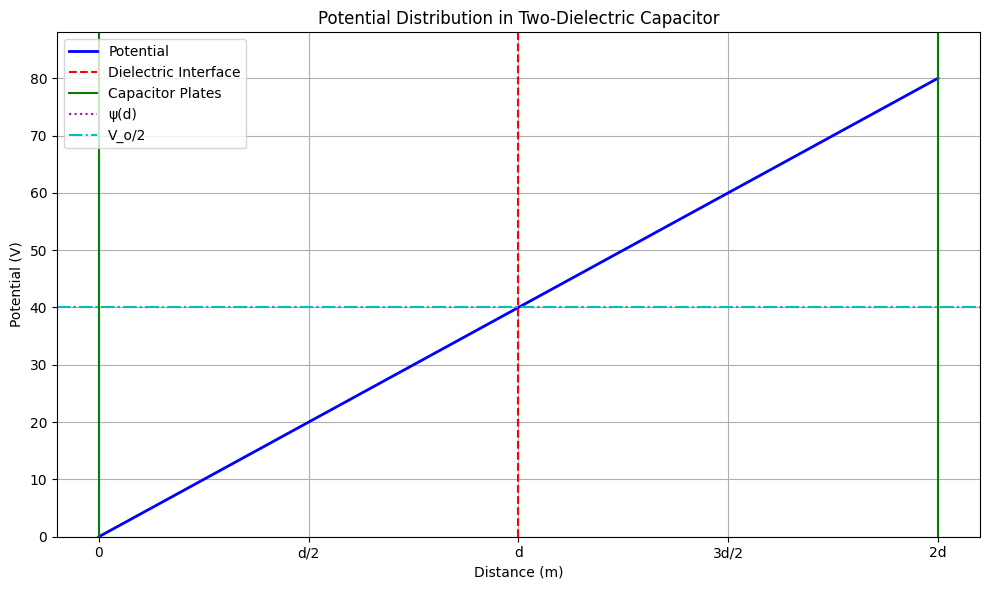

In [17]:
import matplotlib.pyplot as plt

# From the exact soln, we know that
psi_2 = (V_o * e_2) / (e_1 + e_2)

psi_1 = (psi_2 + 0) / 2
psi_3  = (psi_2 + V_o) / 2

for i in range(10):
  psi_1 = (0 + psi_2) / 2
  psi_3 = (V_o + psi_2) / 2

print(f"psi_1: {psi_1:.2f}, psi_2: {psi_2:.2f}, psi_3: {psi_3:.2f}")

distances = [0, d/2, d, 3*d/2, 2*d]
potentials = [0, psi_1, psi_2, psi_3, V_o]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(distances, potentials, 'b-', linewidth=2, label='Potential')
ax.axvline(x=d, color='r', linestyle='--', label='Dielectric Interface')
ax.axvline(x=0, color='g', linestyle='-', label='Capacitor Plates')
ax.axvline(x=2*d, color='g', linestyle='-')
ax.axhline(y=psi_2, color='m', linestyle=':', label='ψ(d)')
ax.axhline(y=V_o/2, color='c', linestyle='-.', label='V_o/2')

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Potential (V)')
ax.set_title('Potential Distribution')
ax.legend()

ax.set_xticks(distances)
ax.set_xticklabels(['0', 'd/2', 'd', '3d/2', '2d'])
ax.set_ylim(0, V_o * 1.1)

plt.grid(True)
plt.tight_layout()
plt.show()

The above plot is made when e_1 and e_2 are equal

psi_1: 6.67, psi_2: 13.33, psi_3: 46.67


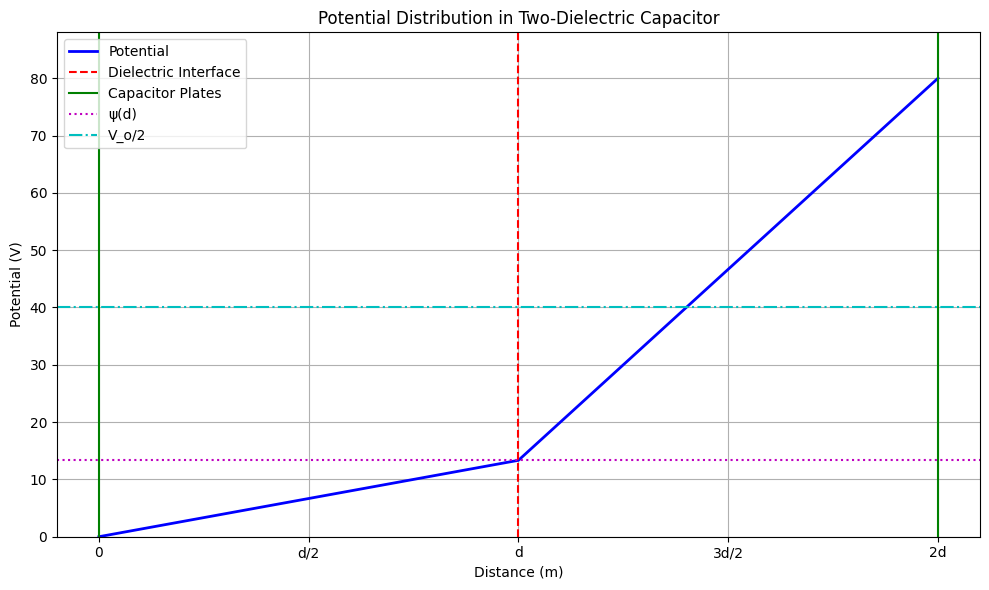

In [20]:
# Slightly varying e_2
import matplotlib.pyplot as plt

e_1 = 5
e_2 = 1

# From the exact soln, we know that
psi_2 = (V_o * e_2) / (e_1 + e_2)

psi_1 = (psi_2 + 0) / 2
psi_3  = (psi_2 + V_o) / 2

for i in range(10):
  psi_1 = (0 + psi_2) / 2
  psi_3 = (V_o + psi_2) / 2

print(f"psi_1: {psi_1:.2f}, psi_2: {psi_2:.2f}, psi_3: {psi_3:.2f}")

distances = [0, d/2, d, 3*d/2, 2*d]
potentials = [0, psi_1, psi_2, psi_3, V_o]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(distances, potentials, 'b-', linewidth=2, label='Potential')
ax.axvline(x=d, color='r', linestyle='--', label='Dielectric Interface')
ax.axvline(x=0, color='g', linestyle='-', label='Capacitor Plates')
ax.axvline(x=2*d, color='g', linestyle='-')
ax.axhline(y=psi_2, color='m', linestyle=':', label='ψ(d)')
ax.axhline(y=V_o/2, color='c', linestyle='-.', label='V_o/2')

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Potential (V)')
ax.set_title('Potential Distribution in Two-Dielectric Capacitor')
ax.legend()

ax.set_xticks(distances)
ax.set_xticklabels(['0', 'd/2', 'd', '3d/2', '2d'])
ax.set_ylim(0, V_o * 1.1)

plt.grid(True)
plt.tight_layout()
plt.show()

When e_2 is significantly low